In [1]:
#test2: with outliers (>Q3 + 1.5 IQR, < Q1 - 1.5IQR) removed before normalization
import os
import sys 
sys.path.remove('/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests')
sys.path.append('/Users/karolinagrzeszkiewicz/locomotion')
import locomotion 
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm

In [2]:
FR_test_high = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results2/FR_test_higher/Results_BDD.csv")
FR_test_low = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results2/FR_test_lower/Results_BDD.csv")
density_test_high = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results2/density_test_higher/Results_BDD.csv") 
density_test_low = pd.read_csv("/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results2/density_test_lower/Results_BDD.csv")

In [3]:
#some data cleaning
FR_high_sequence = []
for i in range(24, 120, 2):
    FR_high_sequence.append(i)
    
FR_test_high.columns = FR_high_sequence
FR_test_high['curve_no'] = list(range(0,50))
FR_test_high = FR_test_high.melt(id_vars=["curve_no"],var_name= "FR", value_name= "Value")
FR_test_high.sort_values(by=['curve_no','FR'],inplace=True)

FR_low_sequence = []
for i in range(6, 24, 1):
    FR_low_sequence.append(i)
    
FR_test_low.columns = FR_low_sequence
FR_test_low['curve_no'] = list(range(0,50))
FR_test_low = FR_test_low.melt(id_vars=["curve_no"],var_name= "FR", value_name= "Value")
FR_test_low.sort_values(by=['curve_no','FR'],inplace=True)

In [4]:
density_high_sequence = list(range(10, 20, 1))

#density values copied from the Results_variables.json file 
    
density_test_high.columns = density_high_sequence
density_test_high['curve_no'] = list(range(0,50))
density_test_high = density_test_high.melt(id_vars=["curve_no"],var_name= "density", value_name= "Value")
density_test_high.sort_values(by=['curve_no','density'],inplace=True)

density_low_sequence = list(range(1, 10, 1))
    
density_test_low.columns = density_low_sequence
density_test_low['curve_no'] = list(range(0,50))
density_test_low = density_test_low.melt(id_vars=["curve_no"],var_name= "density", value_name= "Value")
density_test_low.sort_values(by=['curve_no','density'],inplace=True)

In [5]:
density_test = pd.concat([density_test_low, density_test_high])
FR_test = pd.concat([FR_test_low, FR_test_high])

In [6]:
#assume we're given a data frame with 3 columns: 'curve_no', 'FR'/'RES', 'Value' (BDD) 
#important: if the data frame = 2 data frames merged then rememember not to double-count values for curves with meanVAR
#even if double counting it shouln't affect the outcome (only the number of curves will be greater)

def plotBDDforVar (data_Vartest, Var, meanVar):
    n_values = data_Vartest[Var].nunique()
    n_curves = int((len(data_Vartest.Value))/n_values) 
    colors = cm.rainbow(np.linspace(0, 1, 50))
    
    if Var == "FR":
        for i, c in zip(range(n_curves), colors):
            data = data_Vartest[data_Vartest.curve_no == i]
            data_curve = data[data.FR != meanVar]
            plt.scatter('FR','Value',data= data_curve[data_curve.curve_no == i], color = c)
        plt.title("BDD Value vs. Frame Rate (frames/sec) for " + str(n_curves) + " Randomly Generated Curves")
    elif Var == "density":
        for i, c in zip(range(n_curves), colors):
            data = data_Vartest[data_Vartest.curve_no == i]
            data_curve = data[data.density != meanVar]
            plt.scatter('density','Value',data= data_curve[data_curve.curve_no == i], color = c)
        plt.title("BDD Value vs. pixel density (px/mm) for " + str(n_curves) + " Randomly Generated Curves")
    else:
        print("The variable must be either FR (Frame Rate) or RES (Resolution)")
        
        
#add label, x and y, better title
#add more error messages if applied to wrong arguments
#investigate outliers
#plot curves separately/separate curves

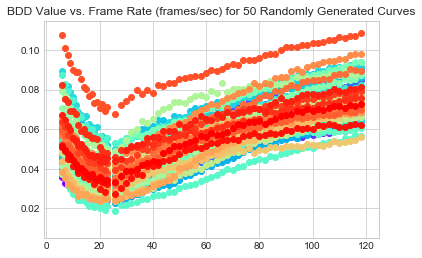

In [7]:
plotBDDforVar(FR_test, "FR", 24)

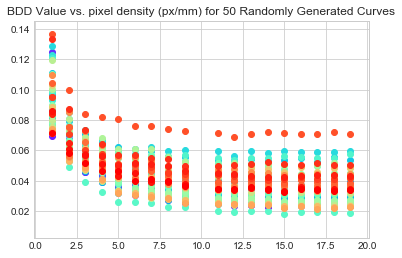

In [8]:
plotBDDforVar(density_test, "density", 10)

In [9]:
#plot curves separately 

def plotBDDforVarSep (var, meanVar, curves = range(50)):
    colors = cm.rainbow(np.linspace(0, 1, 50))
    if var == "FR":
        for i, c in zip(curves, colors):
            data = FR_test[FR_test.curve_no == i]
            data = data[data.FR != meanVar]
            label = 'curve ' + str(i)
            xlab = 'FR' + ' for '+ label
            ylab = 'BDD value' + ' for '+ label
            ax = sns.jointplot(x = 'FR', y = 'Value', data = data)
            ax.set_axis_labels(xlab, ylab, fontsize=14)
    elif var == "density":
        for i in curves:
            data = density_test[density_test.curve_no == i]
            data = data[data.density != meanVar]
            label = 'density_test_curve ' + str(i)
            xlab = 'density' + ' for '+ label
            ylab = 'BDD value' + ' for '+ label
            ax = sns.jointplot(x='density',y='Value', data= data)
            ax.set_axis_labels(xlab, ylab, fontsize=14)
    else:
        print("There is no such variable as " + var)

In [10]:
#Find outliers for FR
FR_test[FR_test.Value > 0.06]
FR_outlier_curves = FR_test.curve_no[FR_test.Value > 0.06]
FR_outlier_curves.unique()
#curve_no 44 is an outlier

array([10, 14, 16, 17, 20, 24, 26, 29, 30, 33, 40, 42, 44, 45, 46, 47,  0,
        1,  2,  3,  4,  5,  6,  7,  8,  9, 11, 12, 13, 15, 18, 19, 22, 23,
       25, 27, 28, 31, 32, 34, 36, 37, 38, 39, 41, 43, 48, 49])

In [11]:
#density
#Find outliers for FR
density_test[density_test.Value > 0.06]
density_outlier_curves = density_test.curve_no[density_test.Value > 0.12]
density_outlier_curves
#curve_no 44 is an outlier

3      3
16    16
17    17
19    19
44    44
46    46
Name: curve_no, dtype: int64

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1676: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  f = plt.figure(figsize=(height, height))


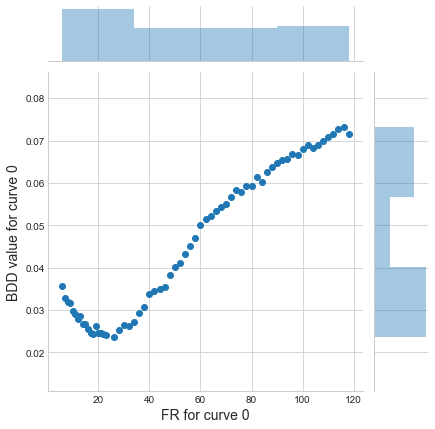

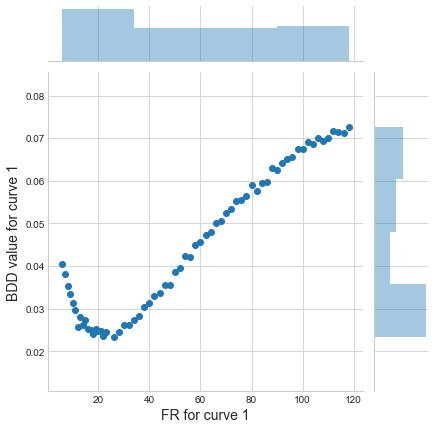

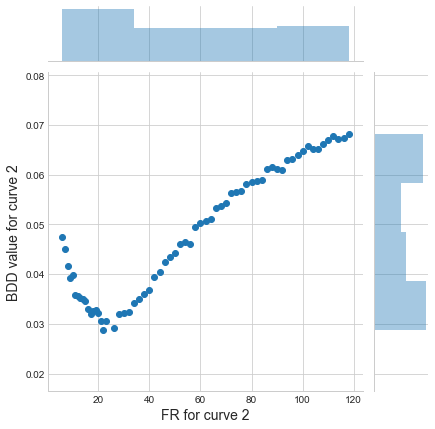

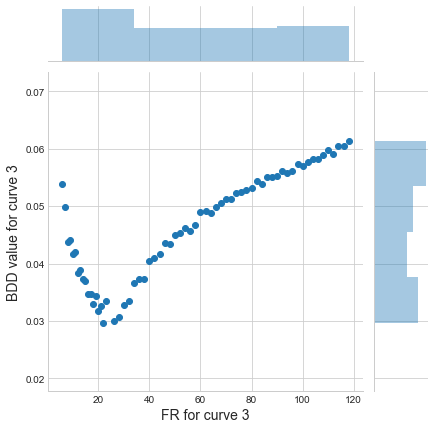

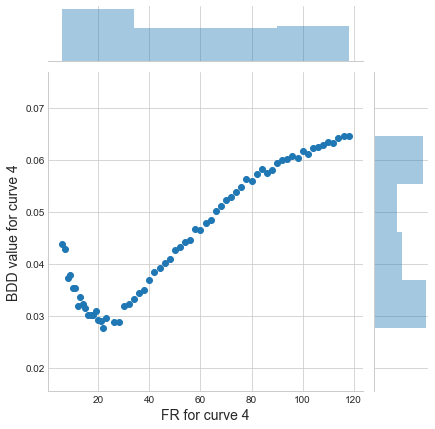

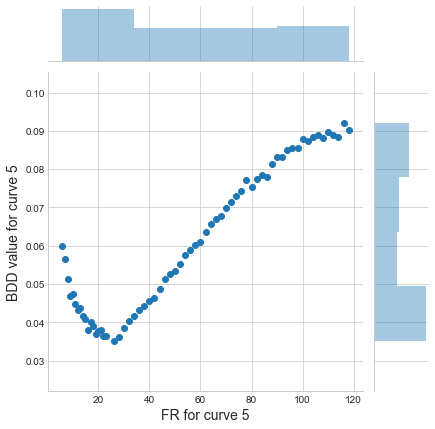

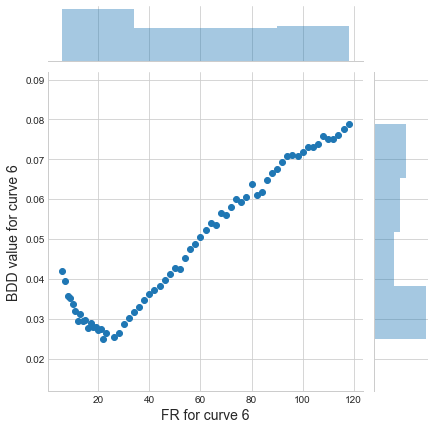

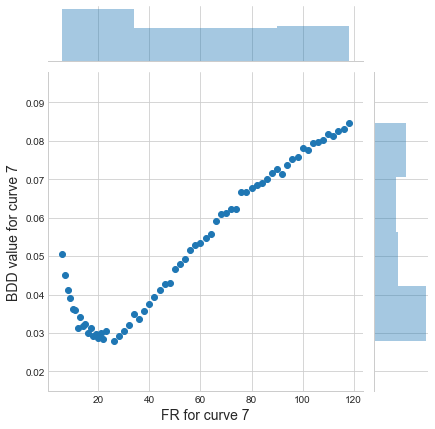

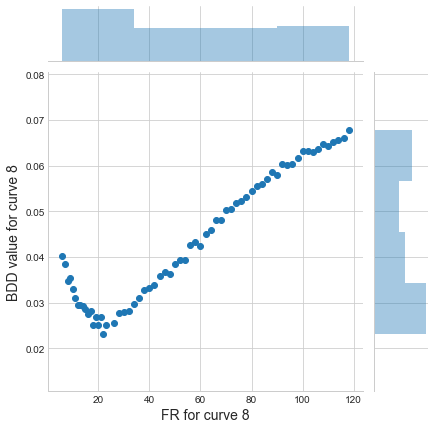

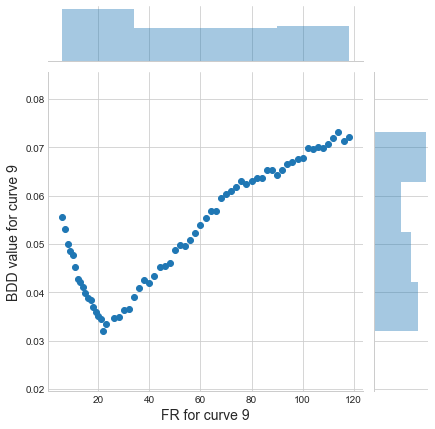

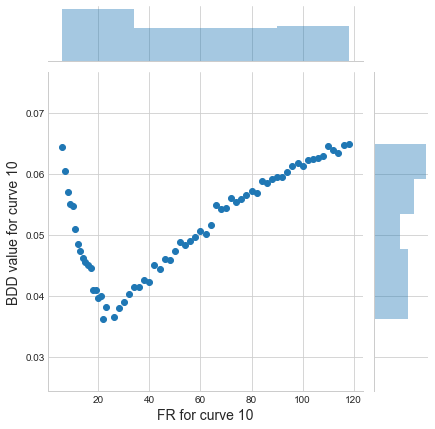

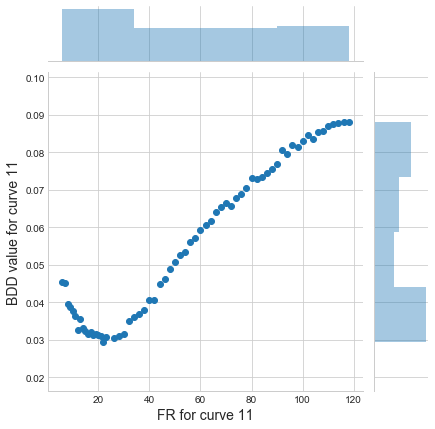

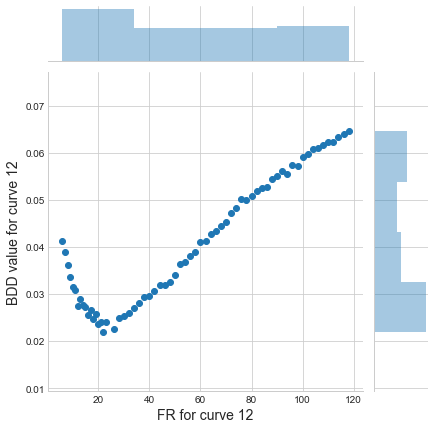

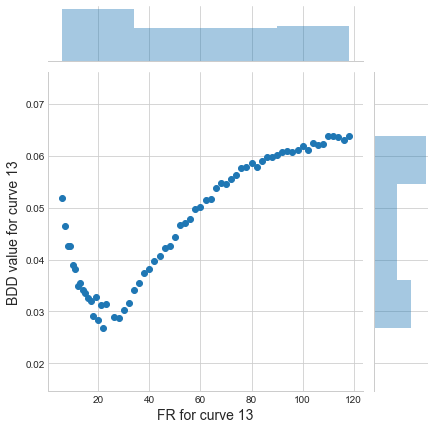

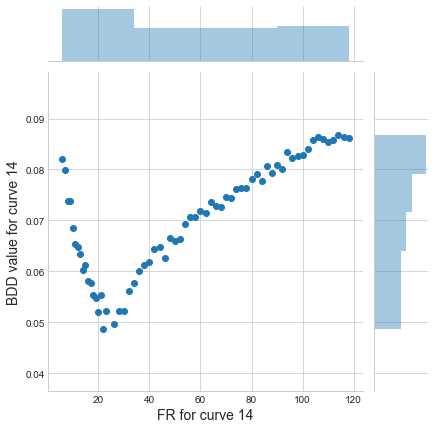

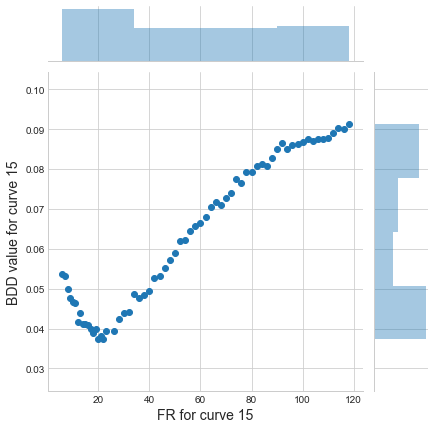

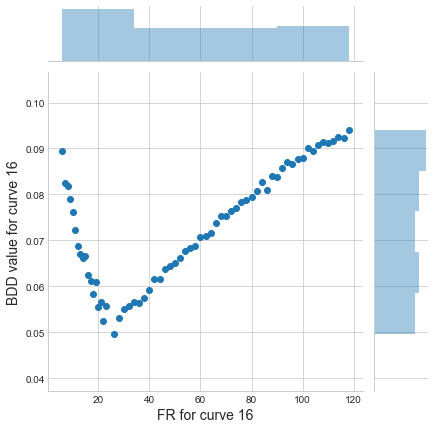

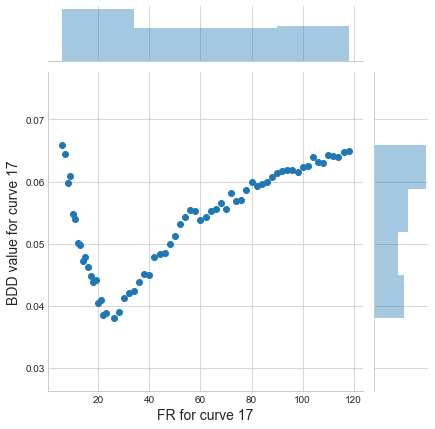

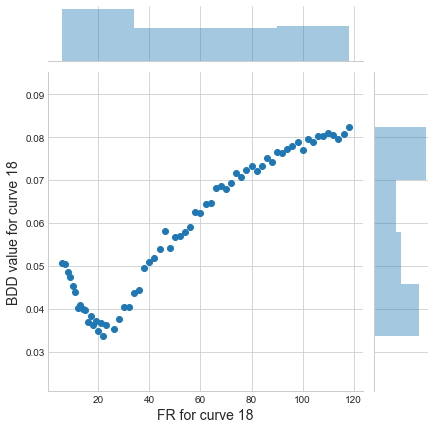

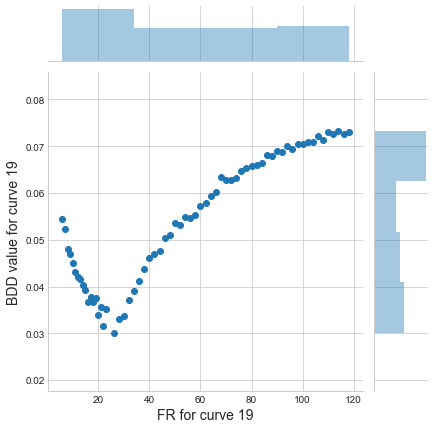

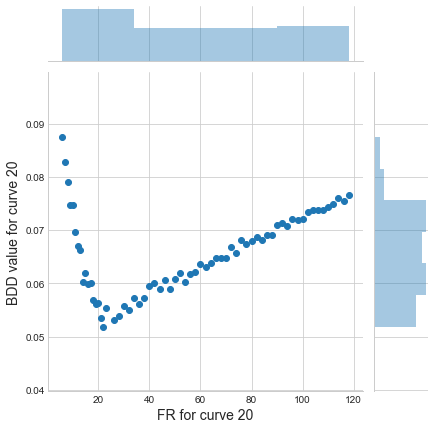

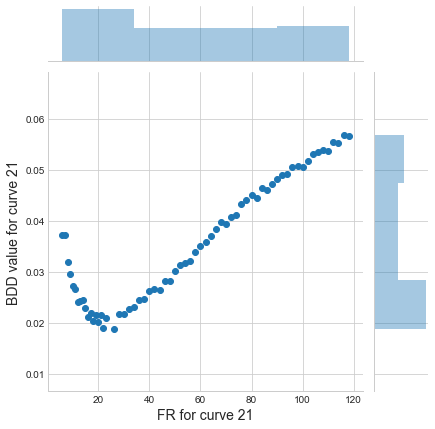

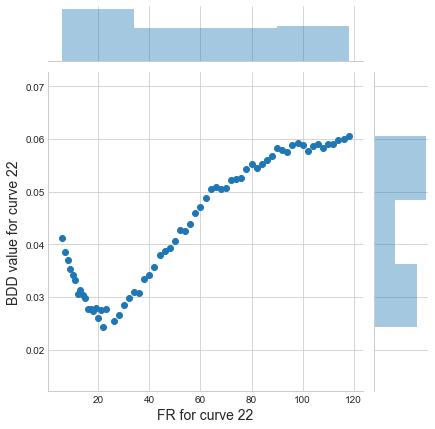

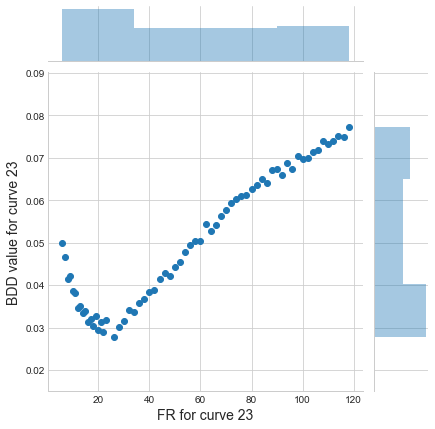

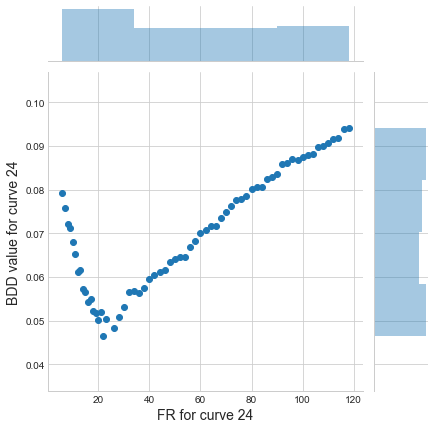

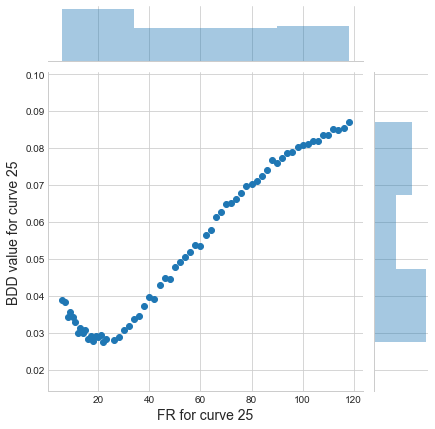

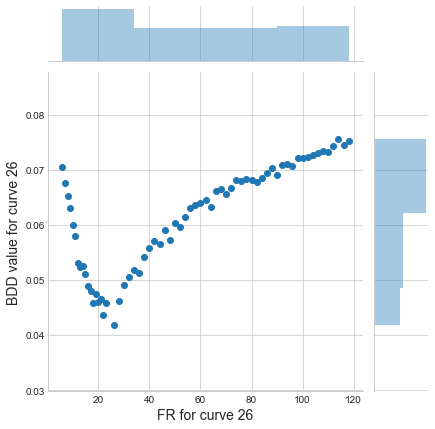

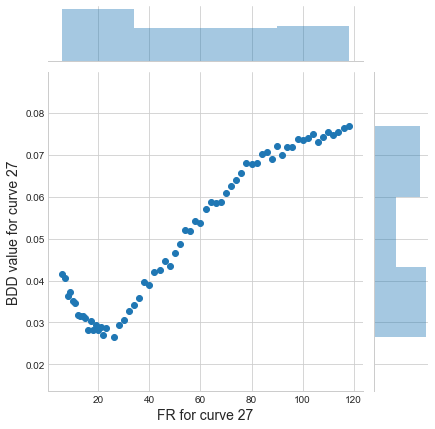

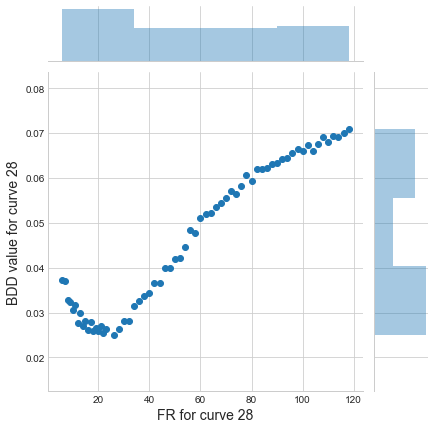

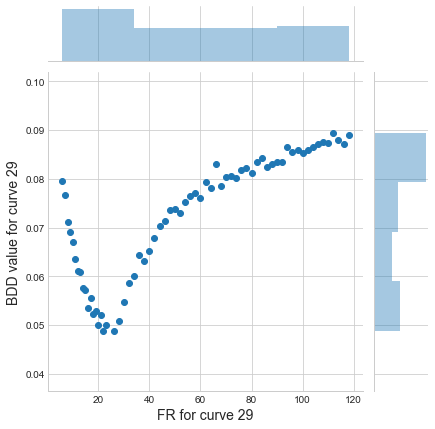

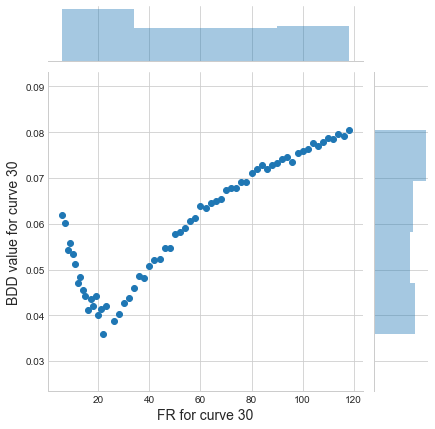

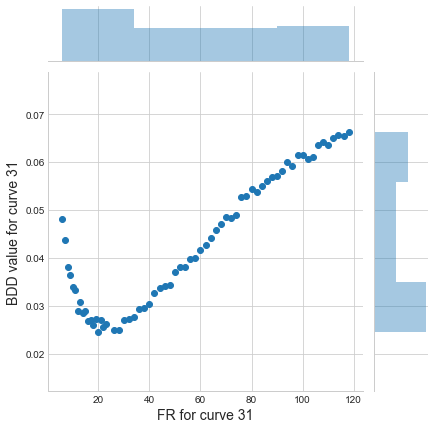

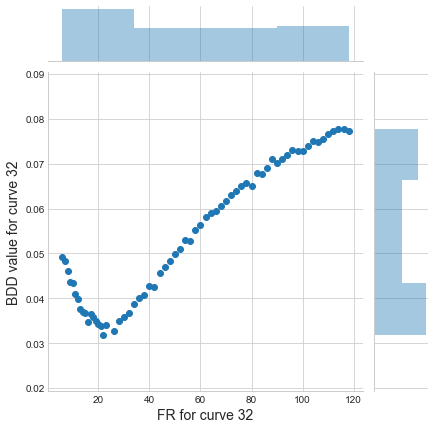

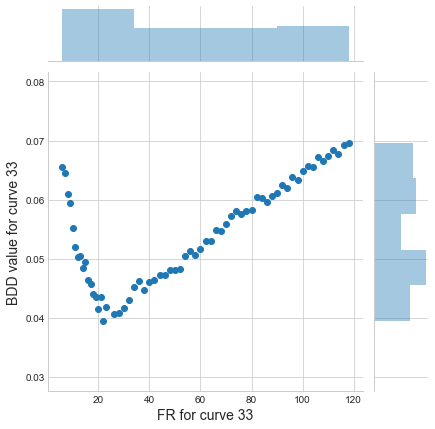

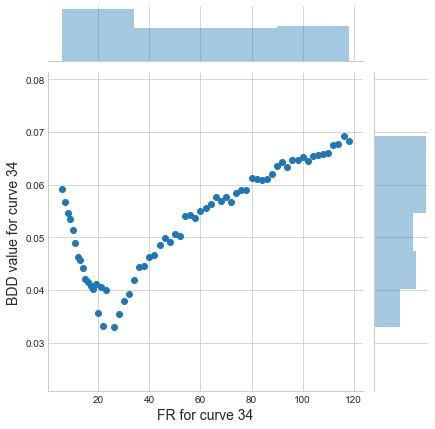

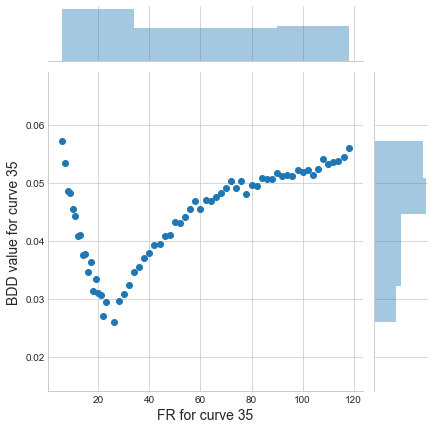

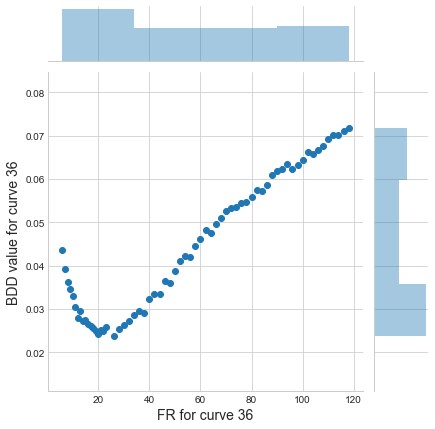

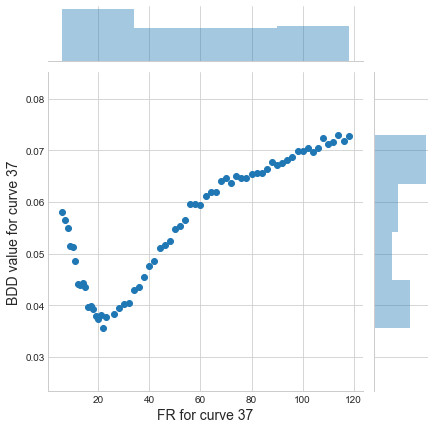

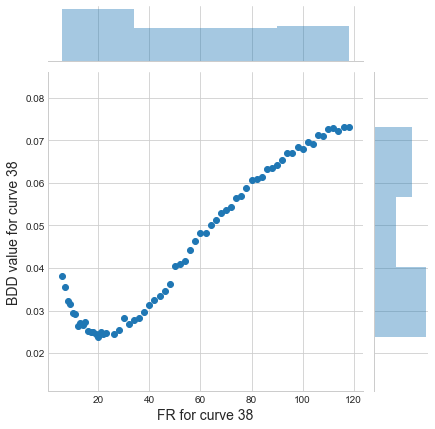

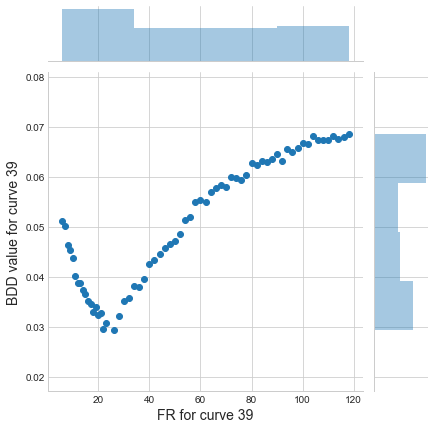

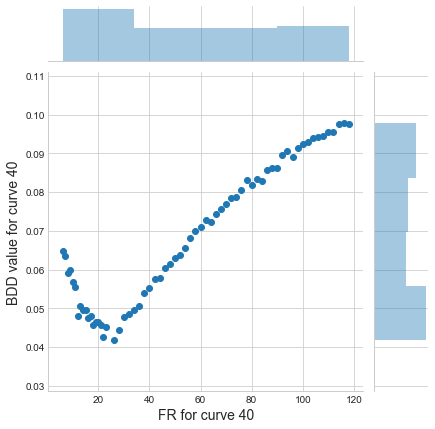

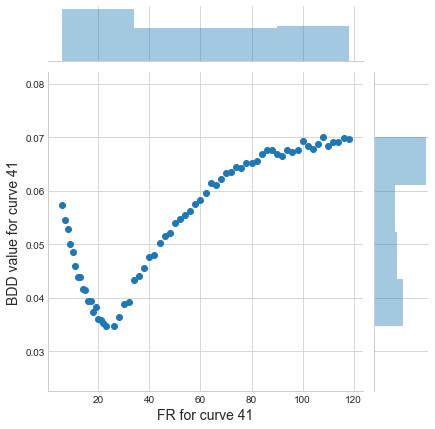

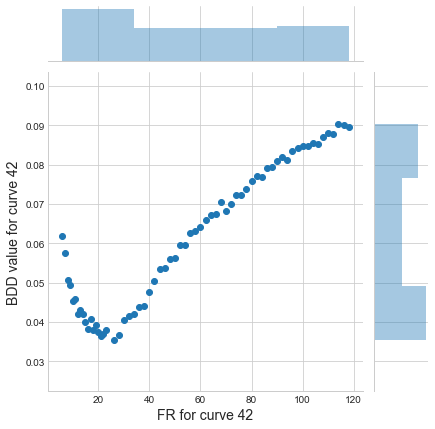

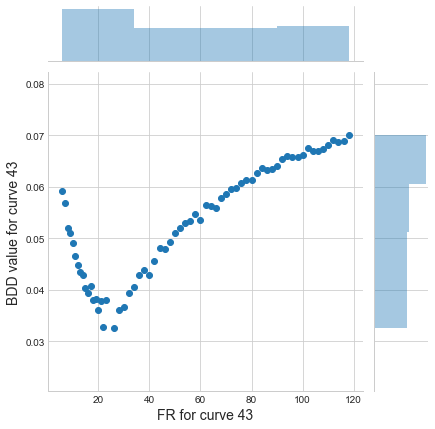

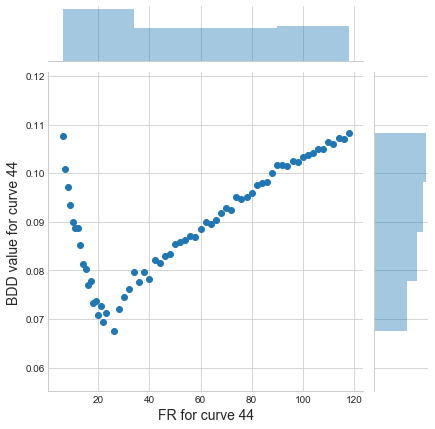

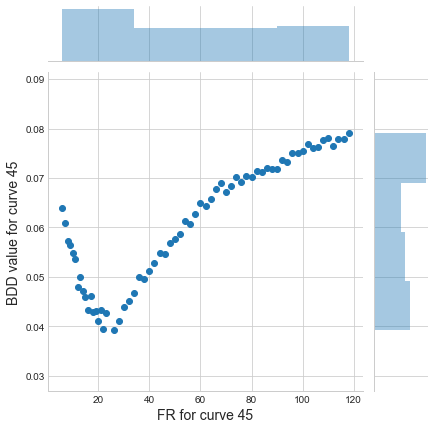

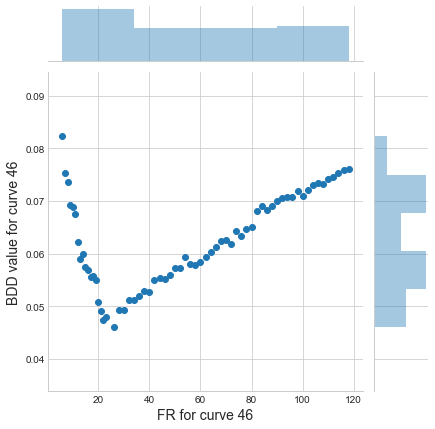

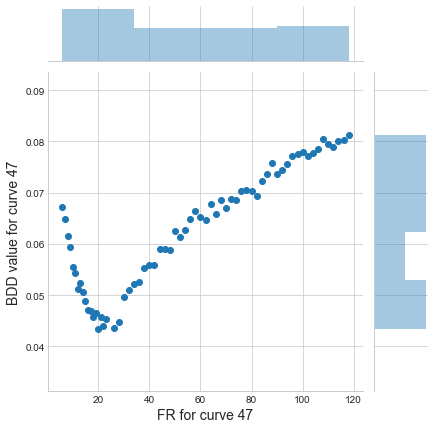

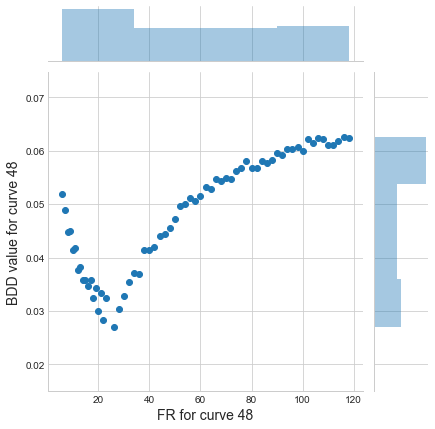

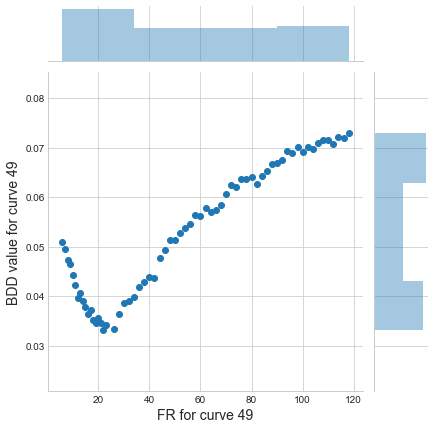

In [12]:
plotBDDforVarSep("FR", 24)
#outlier curves: 44
#non-smooth curves: 2, (3), (4), 5, 10, (19), 22 (for low FR), 24, 34 (for low FR), 43 (6-9 curves)
#curve 2 was smooth in the last robustness test! just like 5, 3, 10, 22 (low), 43
#unlike 6
#more smooth now: 11, 13 (big diff) small diff:, 15, 16 (bef. 15 and 16 and 26 and48 44 consisted of 2 lines), 18, 20, 23, 24, 26
#28 (no jumps anymore, ), 29 (significantly), 31, 32, 34 (still scatter but better), 36, 37, 41, 42 (both signif),44,47,49

#change of shape for many smooth curves

#a lot of curves that were smooth and converging are now smooth and increasing
#are these the same curves that had high curvature?
#high curvature #34, 35, 43, 12, 13, 19 #not really 

#perfectly smooth: 11, 13 (2 outliers for low FR, conv. to 0.02), 32, 42
#(some perfectly smooth curves converge to approx. 0.015-0.02)
# 15, 18, 26 increase very quickly to 0.04-0.05, 33

#it seems that the curves can be grouped into types according to plot shape
#investigate big jumps

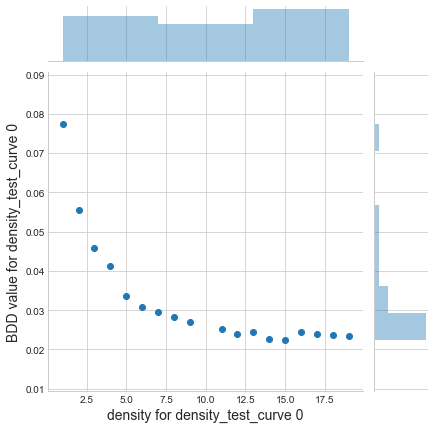

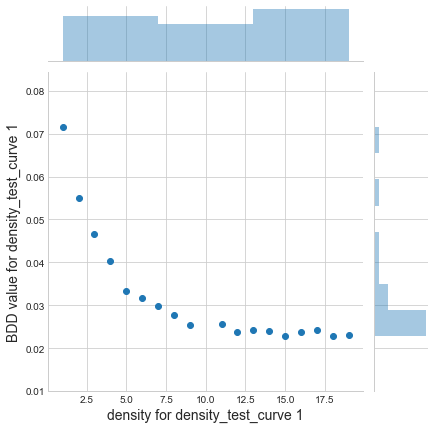

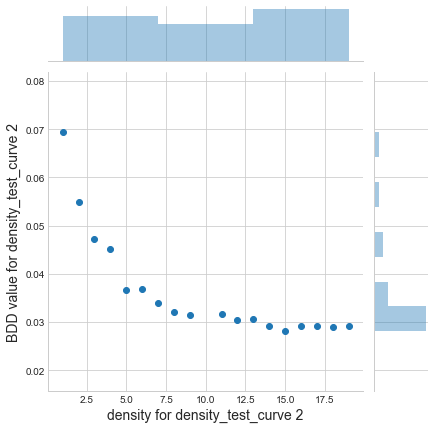

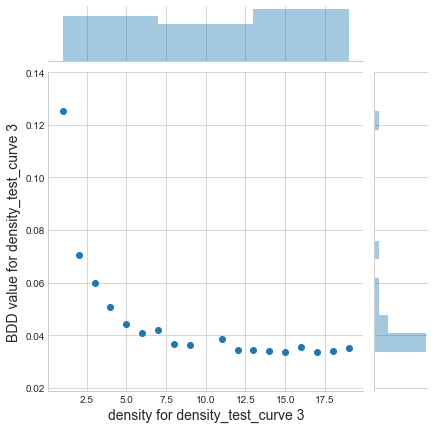

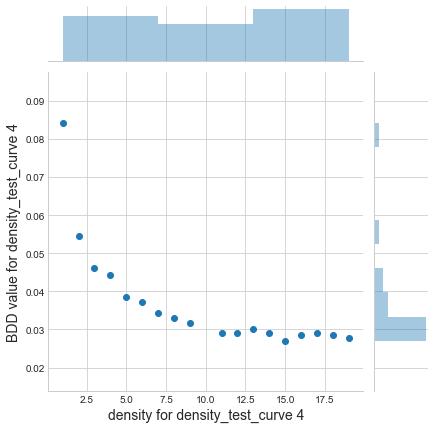

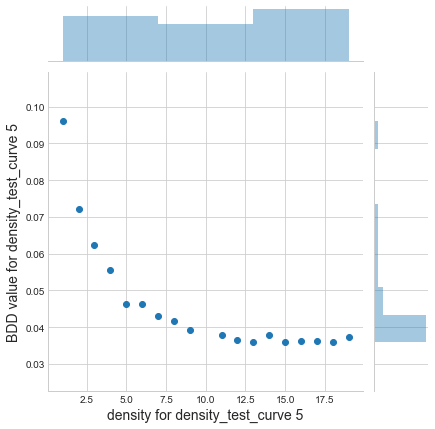

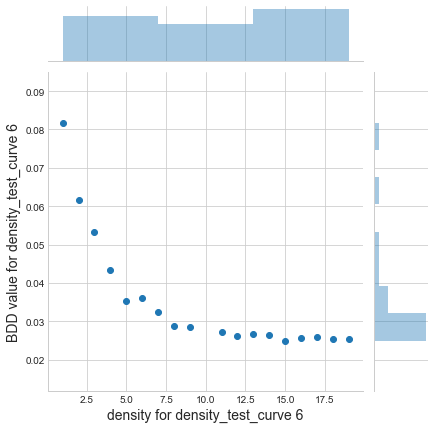

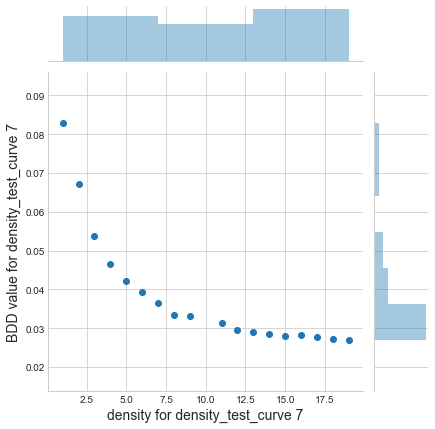

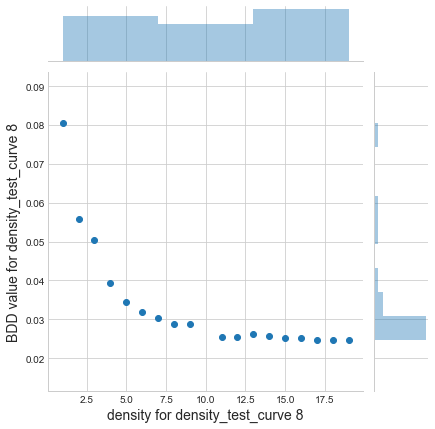

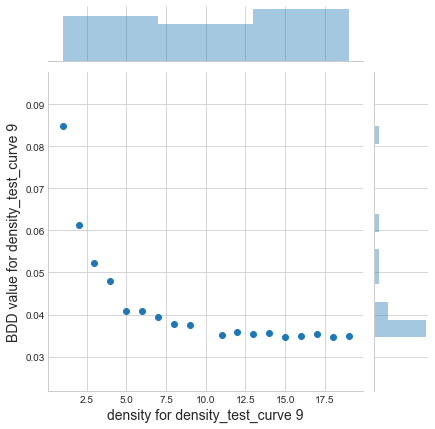

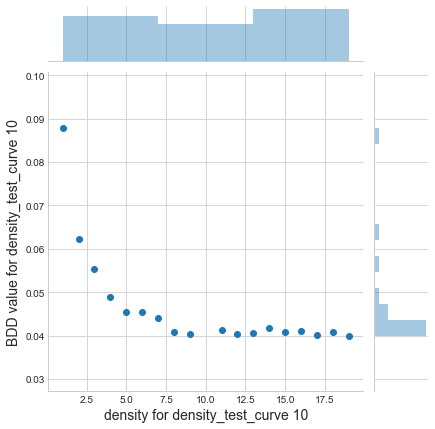

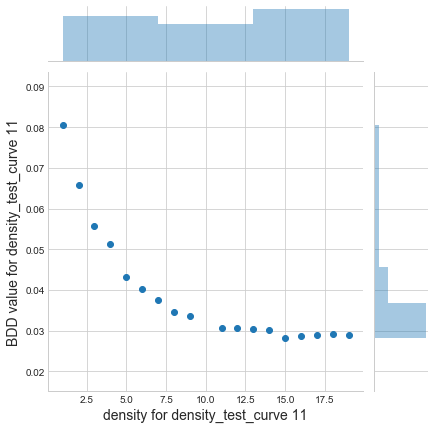

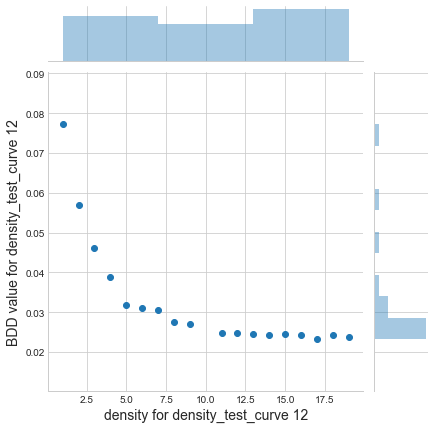

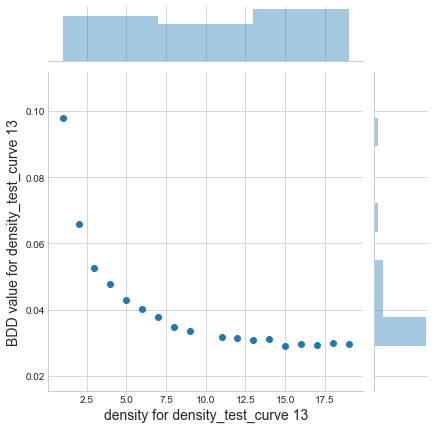

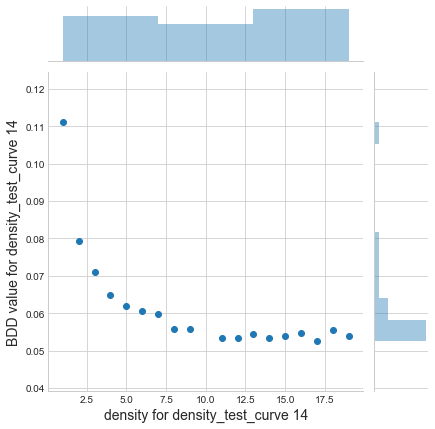

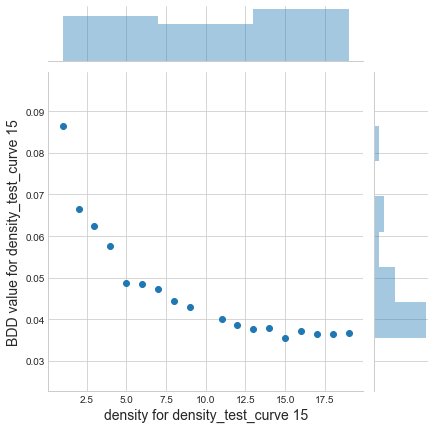

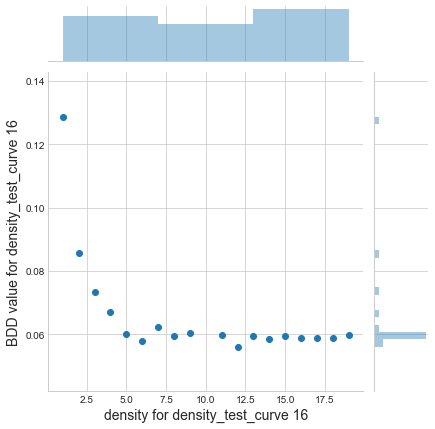

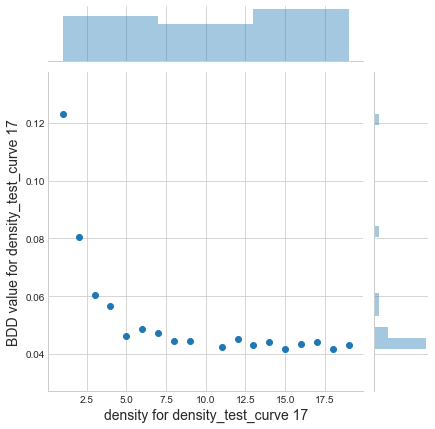

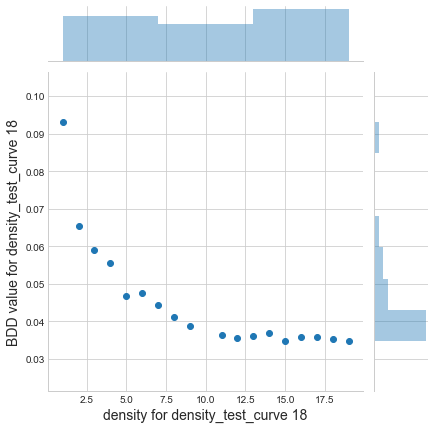

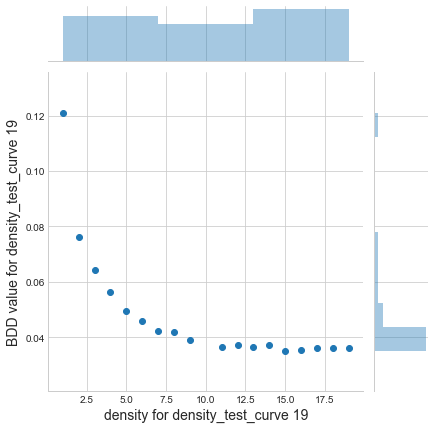

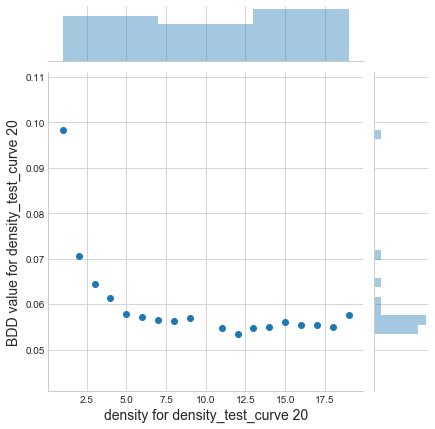

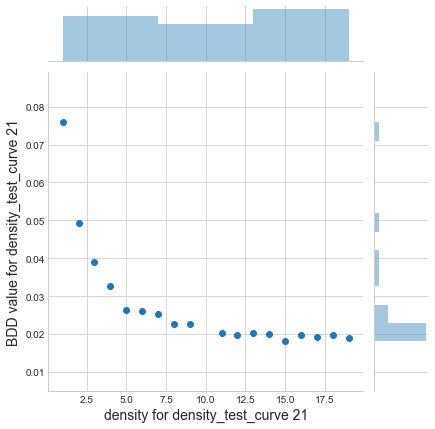

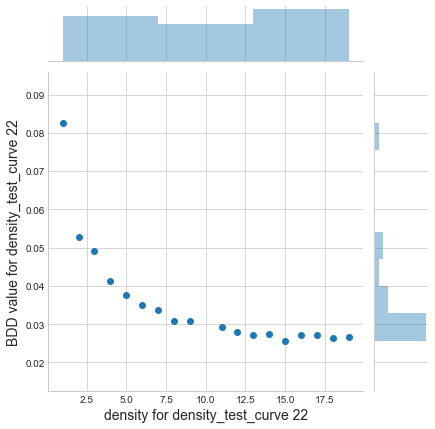

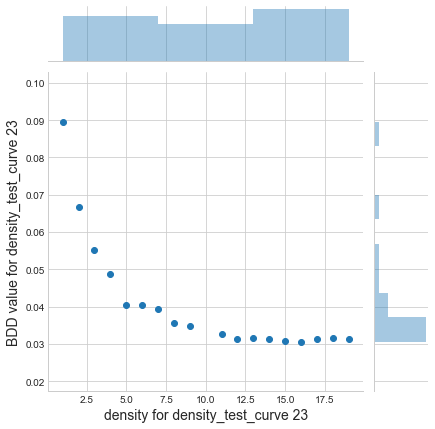

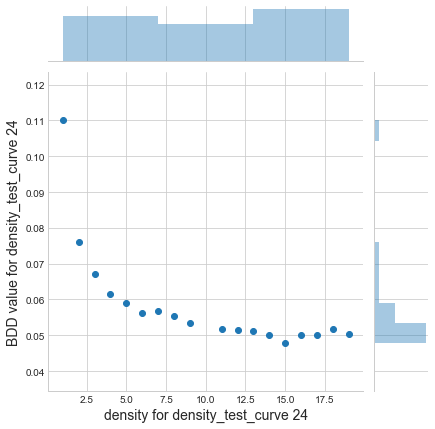

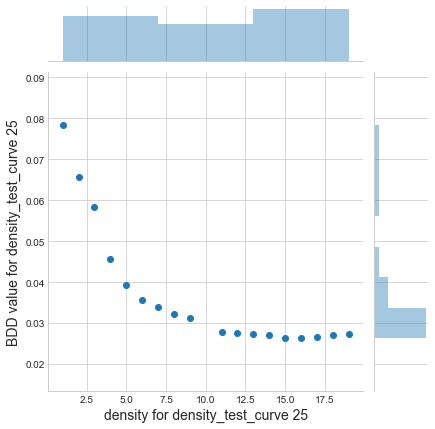

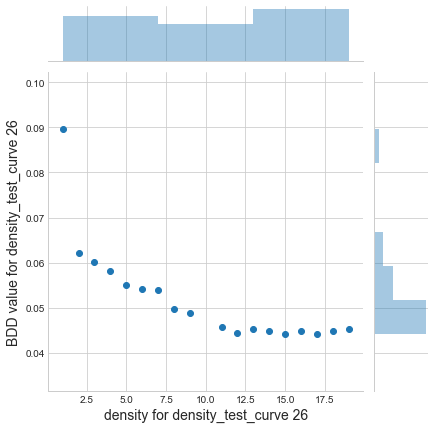

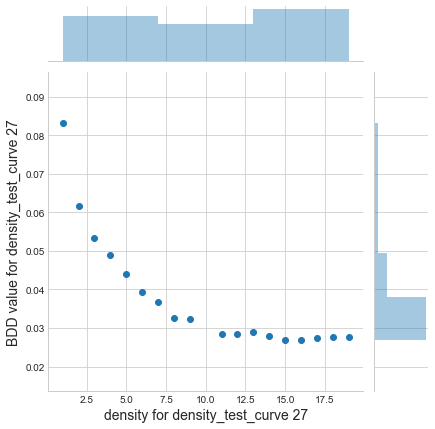

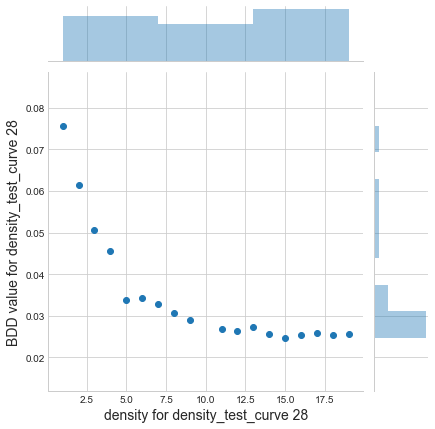

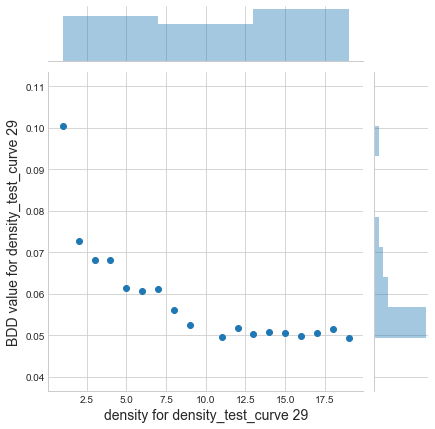

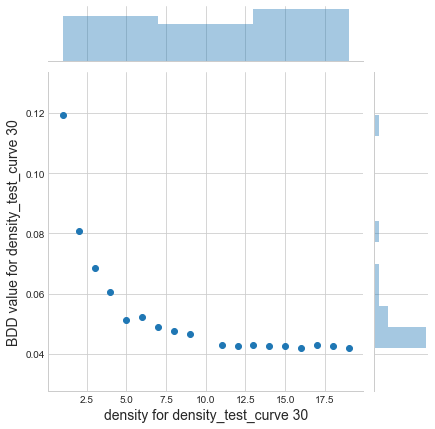

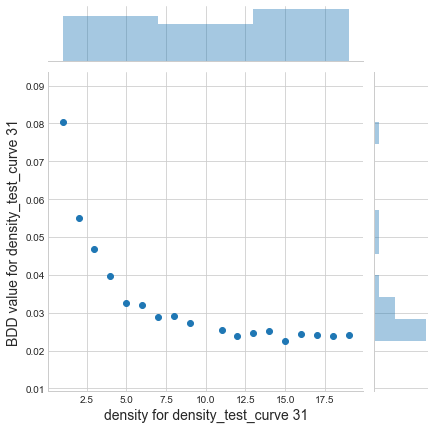

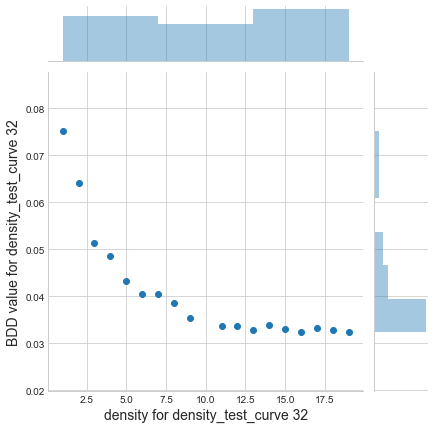

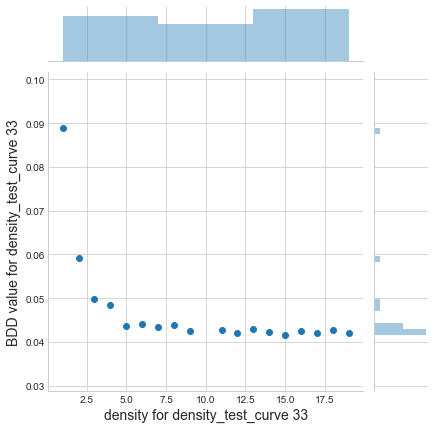

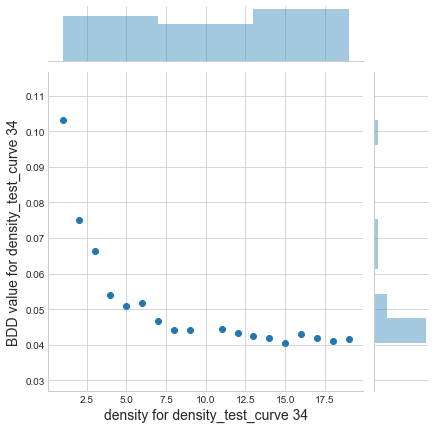

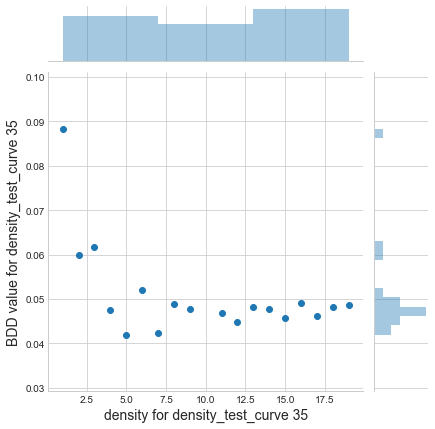

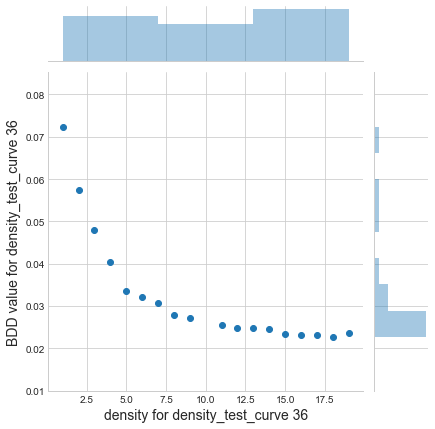

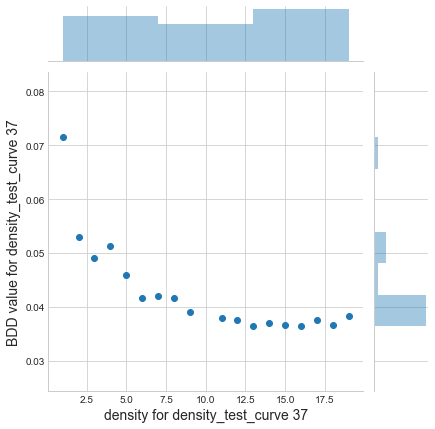

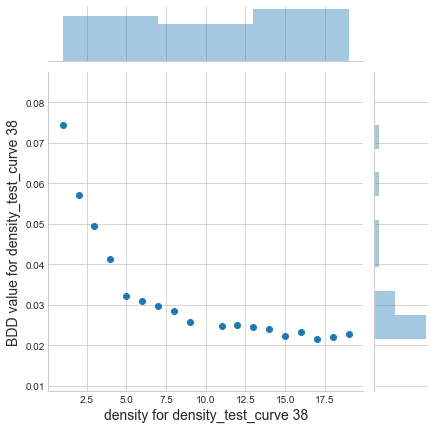

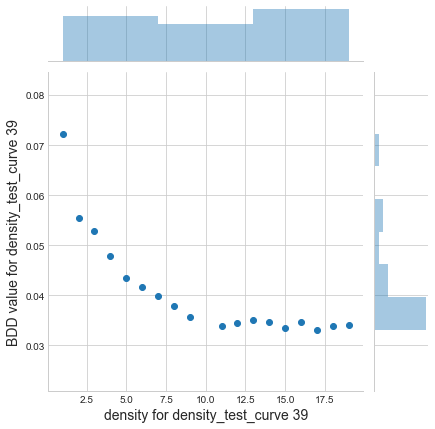

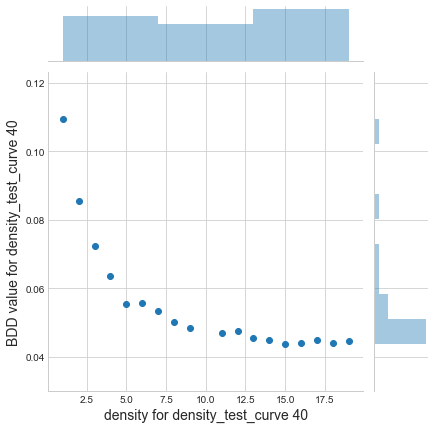

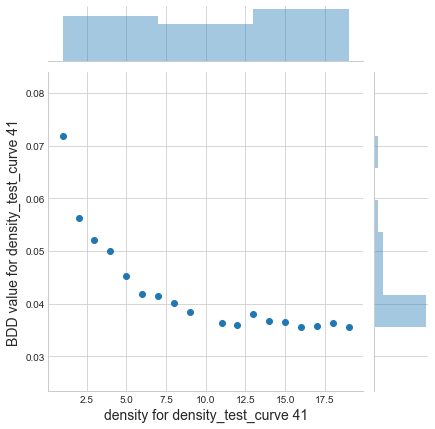

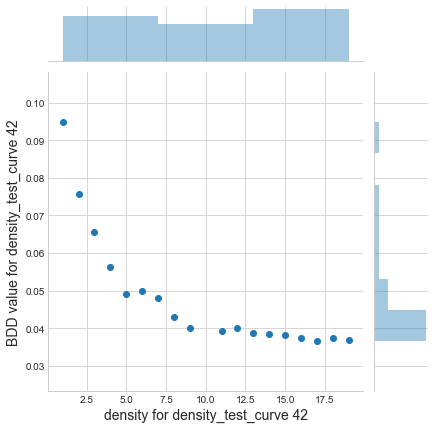

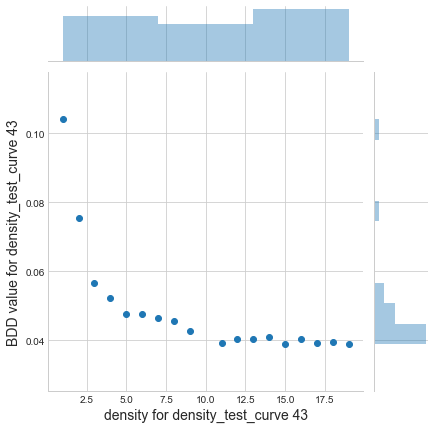

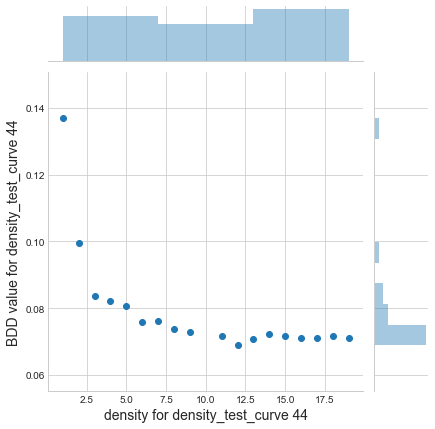

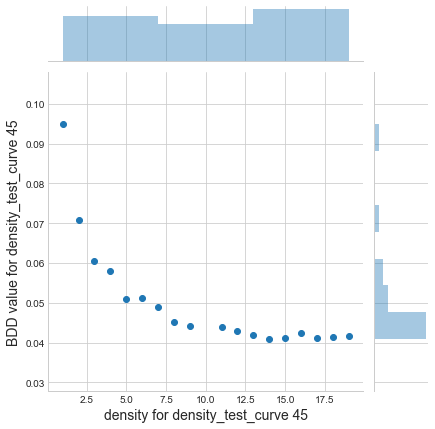

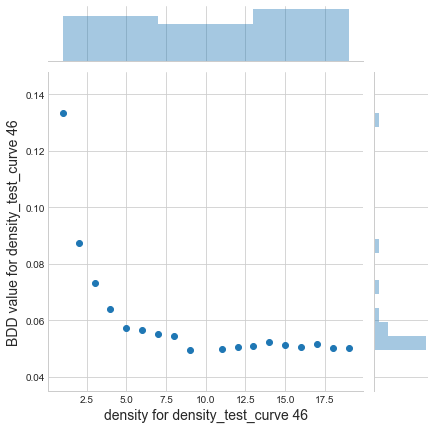

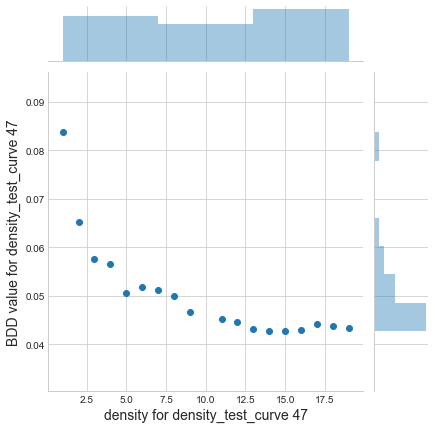

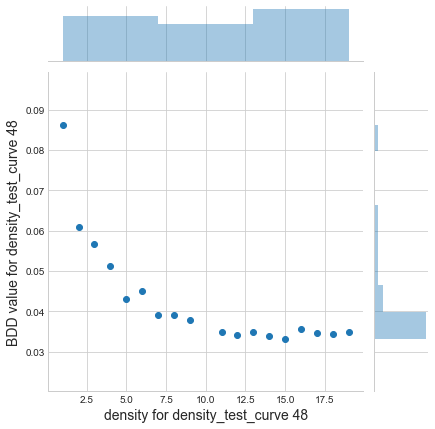

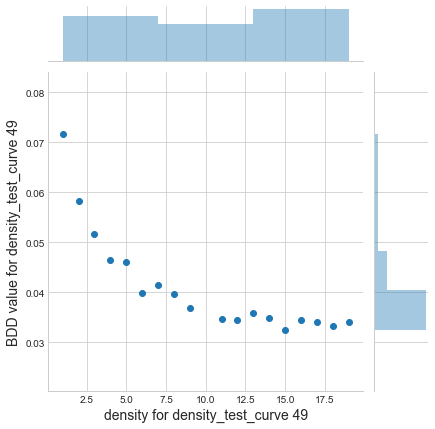

In [13]:
plotBDDforVarSep("density", 10)